Análisis explotario de datos de la página Amazon México

Resumen


Este trabajo tiene como finalidad dar a conocer los precios de diversos teléfonos celulares, así como su rating, fecha de envío entre otras caracteristicas.
Se utilizaron datos de la página Amazon México en la categoria de celulares de los cuales se obtuvo una base de datos de 3744 productos relacionados con esta categoría.
Cabe destacar que los resultados son interesante debido a que los celulares de mayor precio son los de marca Apple, comparados con los de la marca Xiaomi que poseen modelos de 3 mil pesos.
Conforme al ranking los mayores son los Xiaomi debido a su relación calidad-precio

Abstract


This work aims to present the prices of various cell phones, as well as their ratings, shipping dates, among other characteristics. Data from the Amazon Mexico website in the cell phone category was used, from which a database of 3744 products related to this category was obtained. It is worth noting that the results are interesting because the most expensive cell phones are from the Apple brand, compared to Xiaomi brand phones that have models priced at 3,000 pesos. According to the ranking, Xiaomi phones stand out due to their quality-price ratio.

1. Introducción

Este proyecto es un proyecto final de analisis de datos explotario.
Los datos obtenidos en este proyecto fueron de la plataforma Amazon.
Se determino cuantos teléfonos celulares había en dicha plataforma así como conocer su variedad de precios así como su rating, y hacer algunas inferencias sobre cuales son los celulares de mayor rating y de mayor precio.

Este estudio tiene como finalidad, hacer que el consumidor posea una verificación completa sobre los precios de productos que se ofertan en un mercado tan cambiante como el de los celulares y que tambien en ocasiones puede ser peligroso debido a que algunos de estos modelos son reacondicionados, y su precio sigue siendo elevado.



2. Exploración de datos

Para comenzar se importan las librerias y se procede a hacer un get para la peticion HTTP

In [1]:
import requests

from bs4 import BeautifulSoup

In [3]:
pagina_web = requests.get('https://www.amazon.com.mx/s?rh=n%3A9687460011&fs=true&ref=lp_9687460011_sar') 

print(pagina_web)

<Response [200]>


Una vez obtenido el codigo de respuesta 200 que es OK procedemos a extraer la información relevante de la pagina

In [4]:
soup = BeautifulSoup(pagina_web.text,'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="es-mx">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <!-- sp:end-feature:csm:head-open-part2 -->
  <!-- sp:feature:aui-assets -->
  <link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41uFMEFErtL.css,31OSFXVtM5L.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiD

Una vez hayamos visto el contenido de la página procedemos a extraer la información relevante

In [5]:
def obtener_contenido(pagina_web):
    reponse = requests.get(pagina_web)
    return reponse.content

In [6]:
def analizar_contenido(pagina_web):
    return BeautifulSoup(pagina_web, 'html.parser')

In [7]:
data = []

def procesar_pagina(soup, data):
    productos = []
    ratings = []
    precios = []
    fecha_envio = []
    links = []

    producto_items = soup.find_all('h2', class_='a-size-mini a-spacing-none a-color-base s-line-clamp-4')
    for item in producto_items:
        producto =item.text
        productos.append(producto)

    rating_items = soup.find_all('span', class_='a-icon-alt')
    for item in rating_items:
        rating = item.text
        ratings.append(rating)

    precio_items = soup.find_all('span', class_='a-price-whole')
    for item in precio_items:
        precio = item.text
        precios.append(precio)

    fecha_items = soup.find_all('span', class_='a-color-base a-text-bold')
    for item in fecha_items:
        fecha = item.text
        fecha_envio.append(fecha)
        
    link_items = soup.find_all('a', class_='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal')
    for item in link_items:
        links.append(item['href'])
    
    for i in range(len(productos)):
        data.append({
            'Productos': productos[i] if i < len(productos) else None,
            'Rating': ratings[i] if i < len(ratings) else None,
            'Precio': precios[i] if i < len(precios) else None,
            'Fecha de envio': fecha_envio[i] if i < len(fecha_envio) else None,
            'Enlaces': links[i] if i < len(links) else None
        })

In [8]:
url_base = 'https://www.amazon.com.mx/s?rh=n%3A9687460011&fs=true&ref=lp_9687460011_sar' #

num_paginas = 400

In [9]:
def paginacion(url_base, num_paginas):
    for i in range(1, num_paginas + 1):
        url = url_base +str(i) + '/'
        contenido_pagina = obtener_contenido(url)
        soup = analizar_contenido(contenido_pagina)
        procesar_pagina(soup, data)

paginacion(url_base, num_paginas)

In [10]:
data

[{'Productos': 'Xiaomi Smartphone Redmi Note 11s 6.43" 128GB/8GB Cámara 108MP+8MP+2MP+2MP/16MP Mediatek Android 11 Color Gris Grafito  ',
  'Rating': '4.6 de 5 estrellas',
  'Precio': '3,333.',
  'Fecha de envio': 'sáb, 12 de ago ',
  'Enlaces': '/Xiaomi-Celular-Redmi-Note-Graphite/dp/B09R4F1LW4'},
 {'Productos': 'Samsung Galaxy S23 Ultra 12GB_512GB Negro Desbloqueado  ',
  'Rating': '4.8 de 5 estrellas',
  'Precio': '21,199.',
  'Fecha de envio': 'mañana, 11 de ago ',
  'Enlaces': '/Samsung-Galaxy-Ultra-12GB_512GB-Desbloqueado/dp/B0BQXGVMSL'},
 {'Productos': 'Celular Poco X5 Pro 5G Black 8GB RAM 256GB ROM  ',
  'Rating': '4.7 de 5 estrellas',
  'Precio': '8,869.',
  'Fecha de envio': 'lun, 14 de ago ',
  'Enlaces': '/Celular-Poco-Pro-Black-256GB/dp/B0BT8GZV65'},
 {'Productos': 'Apple iPhone 12, 128 GB, Negro - Totalmente Desbloqueado (Reacondicionado)  ',
  'Rating': '4.2 de 5 estrellas',
  'Precio': '6,178.',
  'Fecha de envio': 'sáb, 12 de ago ',
  'Enlaces': '/Apple-iPhone-12-Negro

Una vez extraída la información relevante, se procede a ponerlo en un dataframe

In [11]:
import pandas as pd

df =pd.DataFrame(data)

print(df)

                                              Productos              Rating  \
0     Xiaomi Smartphone Redmi Note 11s 6.43" 128GB/8...  4.6 de 5 estrellas   
1     Samsung Galaxy S23 Ultra 12GB_512GB Negro Desb...  4.8 de 5 estrellas   
2      Celular Poco X5 Pro 5G Black 8GB RAM 256GB ROM    4.7 de 5 estrellas   
3     Apple iPhone 12, 128 GB, Negro - Totalmente De...  4.2 de 5 estrellas   
4     Apple iPhone 11, Totalmente Desbloqueado, 64GB...  4.3 de 5 estrellas   
...                                                 ...                 ...   
4675  Apple iPhone 13 Pro, 256GB, Grafito (Reacondic...  4.4 de 5 estrellas   
4676  Xiaomi Celular Redmi 12C 4GB 128GB Gris Grafit...  4.5 de 5 estrellas   
4677  Apple iPhone 12 Mini, 64GB, Azul (Reacondicion...  4.3 de 5 estrellas   
4678  Google Pixel 7-5G Teléfono Android - Smartphon...  4.4 de 5 estrellas   
4679      Apple - iPhone 11 Pro, 256GB, gris espacial    4.4 de 5 estrellas   

       Precio      Fecha de envio  \
0      3,333. 

In [12]:
df

,Productos,Rating,Precio,Fecha de envio,Enlaces
0,"Xiaomi Smartphone Redmi Note 11s 6.43"" 128GB/8...",4.6 de 5 estrellas,"3,333.","sáb, 12 de ago",/Xiaomi-Celular-Redmi-Note-Graphite/dp/B09R4F1LW4
1,Samsung Galaxy S23 Ultra 12GB_512GB Negro Desb...,4.8 de 5 estrellas,"21,199.","mañana, 11 de ago",/Samsung-Galaxy-Ultra-12GB_512GB-Desbloqueado/...
2,Celular Poco X5 Pro 5G Black 8GB RAM 256GB ROM,4.7 de 5 estrellas,"8,869.","lun, 14 de ago",/Celular-Poco-Pro-Black-256GB/dp/B0BT8GZV65
3,"Apple iPhone 12, 128 GB, Negro - Totalmente De...",4.2 de 5 estrellas,"6,178.","sáb, 12 de ago",/Apple-iPhone-12-Negro-Reacondicionado/dp/B08P...
4,"Apple iPhone 11, Totalmente Desbloqueado, 64GB...",4.3 de 5 estrellas,"6,489.","mañana, 11 de ago",/Apple-iPhone-renovado-Totalmente-Desbloqueado...
...,...,...,...,...,...
4675,"Apple iPhone 13 Pro, 256GB, Grafito (Reacondic...",4.4 de 5 estrellas,"7,274.","sáb, 12 de ago",/Apple-iPhone-Grafito-Reacondicionado-Premium/...
4676,Xiaomi Celular Redmi 12C 4GB 128GB Gris Grafit...,4.5 de 5 estrellas,"11,482.","mañana, 11 de ago",/Xiaomi-Celular-Grafito-Desbloqueado-2212ARNC4...
4677,"Apple iPhone 12 Mini, 64GB, Azul (Reacondicion...",4.3 de 5 estrellas,"8,840.",None,/Apple-iPhone-Mini-64GB-Reacondicionado/dp/B09...
4678,Google Pixel 7-5G Teléfono Android - Smartphon...,4.4 de 5 estrellas,None,None,/Google-Pixel-7-5G-Tel%C3%A9fono-Android/dp/B0...


Posteriormente el dataframe se guarda en un archivo tipo csv

In [16]:
import datetime

fecha_actual = datetime.datetime.now().strftime('%d-%m-%Y')

df.to_csv(f'./Trabajo_Final_Alejandro_Villegas{fecha_actual}.csv', index = False)

3. Análisis de datos

Despues se procede a graficar los resultados de tipo descriptivo

Pero primero se debe cargar el archivo para leerlo en un dataframe

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

archivo = r'C:\Users\cross\OneDrive\Escritorio\Aprendiendo Python 3 Intermedio\Curso python 3 intermedio repositorio\Trabajo_Final\Trabajo_Final_Alejandro_Villegas05-08-2023.csv'

df = pd.read_csv(archivo)

una vez cargado se procede a leerlo para saber que esten los datos

In [4]:
df

,Productos,Rating,Precio,Fecha de envio,Enlaces
0,Xiaomi Celular Redmi Note 11S Graphite Gray 8G...,4.6 de 5 estrellas,"3,333.","lun, 7 de ago",/Xiaomi-Celular-Redmi-Note-Graphite/dp/B09R4F1LW4
1,Samsung Galaxy S23 Ultra 12GB_512GB Negro Desb...,4.7 de 5 estrellas,"21,194.","mañana, 6 de ago",/Samsung-Galaxy-Ultra-12GB_512GB-Desbloqueado/...
2,"Apple iPhone 11, Totalmente Desbloqueado, 64GB...",4.3 de 5 estrellas,"6,548.","mar, 8 de ago",/Apple-iPhone-renovado-Totalmente-Desbloqueado...
3,"Apple iPhone 12, 128 GB, Negro - Totalmente De...",4.2 de 5 estrellas,"8,969.","lun, 7 de ago",/Apple-iPhone-12-Negro-Reacondicionado/dp/B08P...
4,"Xiaomi Smartphone Poco M5s 6.43"" 256GB/8GB Cám...",4.6 de 5 estrellas,"3,333.","mañana, 6 de ago",/Xiaomi-Smartphone-M5s-Mediatek-Android/dp/B0C...
...,...,...,...,...,...
3739,SAMSUNG Galaxy A14 5G Negro,4.5 de 5 estrellas,"2,949.","lun, 7 de ago",/SAMSUNG-Galaxy-A14-5G-Negro/dp/B0BQNF2F48?ufe...
3740,"Apple - iPhone 11 Pro, 256GB, gris espacial",4.4 de 5 estrellas,"8,899.","mañana, 6 de ago",/Apple-iPhone-256GB-Unlocked-Renewed/dp/B07ZQR...
3741,Apple iPhone 14 Pro MAX 128 GB Morado Oscuro,4.8 de 5 estrellas,"28,899.","lun, 7 de ago",/Apple-iPhone-128-GB-Morado-Oscuro/dp/B0BDJ4ST...
3742,Google Pixel 6a - Teléfono Android 5G - Smartp...,4.5 de 5 estrellas,"6,436.","mañana, 6 de ago",/Google-Pixel-Smartphone-Desbloqueado-megap%C3...


posteriormente se procede a graficar

In [4]:
df['Marca'] = df['Productos'].str.split(' ').str[0]
contar_marcas = df['Marca'].value_counts()

plt.figure(figsize=(10, 6))
contar_marcas.plot(kind='bar', color ='b')
plt.title('Conteo de productos por marca')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation =45)
plt.grid()
plt.show()

NameError: name 'df' is not defined

La primer gráfica es una de barras por marca, por los resultados se percibe que los celulares de marca apple son los de mayor cantidad, los cuales los hace lideres en el mercado según la plataforma de Amazon con 1200 ejemplares, mientras que los segundo de mayor demanda son los Xiaomi, se puede inferir que son debido a su precio y funcionalidad.


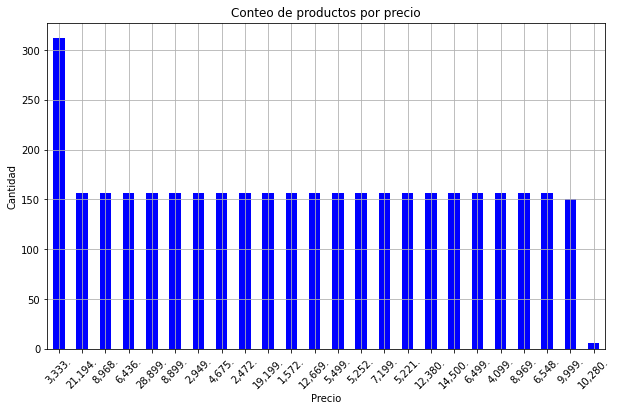

In [14]:
df['Marca'] = df['Precio'].str.split(' ').str[0]
contar_marcas = df['Marca'].value_counts()

plt.figure(figsize=(10, 6))
contar_marcas.plot(kind='bar', color ='b')
plt.title('Conteo de productos por precio')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.xticks(rotation =45)
plt.grid()
plt.show()

se infiere que la mayoria de los telefonos celulares ronda la cantidad de $3000 pesos, los cuales son de diversas marcas y tipos los cuales son populares por su accesibilidad a diferentes usuarios que buscan telefonos que se ajusten s us prespuesto, por otra parte de los telefonos más caros se encuentran los que rondan los 28 mil pesos y 21 mil pesos los cuales se consideran gamas altas y que ademas estan en la misma cantidad de telefonos que el resto que son los 150 ejemplares.

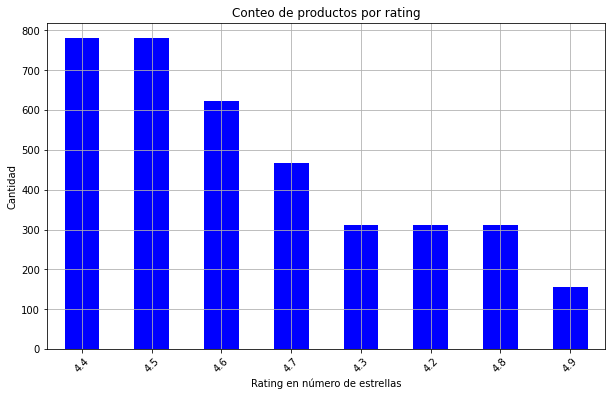

In [16]:
df['Marca'] = df['Rating'].str.split(' ').str[0]
contar_marcas = df['Marca'].value_counts()

plt.figure(figsize=(10, 6))
contar_marcas.plot(kind='bar', color ='b')
plt.title('Conteo de productos por rating')
plt.xlabel('Rating en número de estrellas')
plt.ylabel('Cantidad')
plt.xticks(rotation =45)
plt.grid()
plt.show()

La mayoria de los teléfonos rondan las 4.4 estrellas como rating, no llegan a las 5 estrellas, pero estan en una calificación la cual se puede considerar buena pero no excelente, y estos corresponden a poco mas de 700 productos. Por otro parte, los telefonos con gran calificación de 4.9 tienen un recuneto de poco mas de 100 productos, los cuales los hacen telefonos que son de calidad pero no accesible para todos.

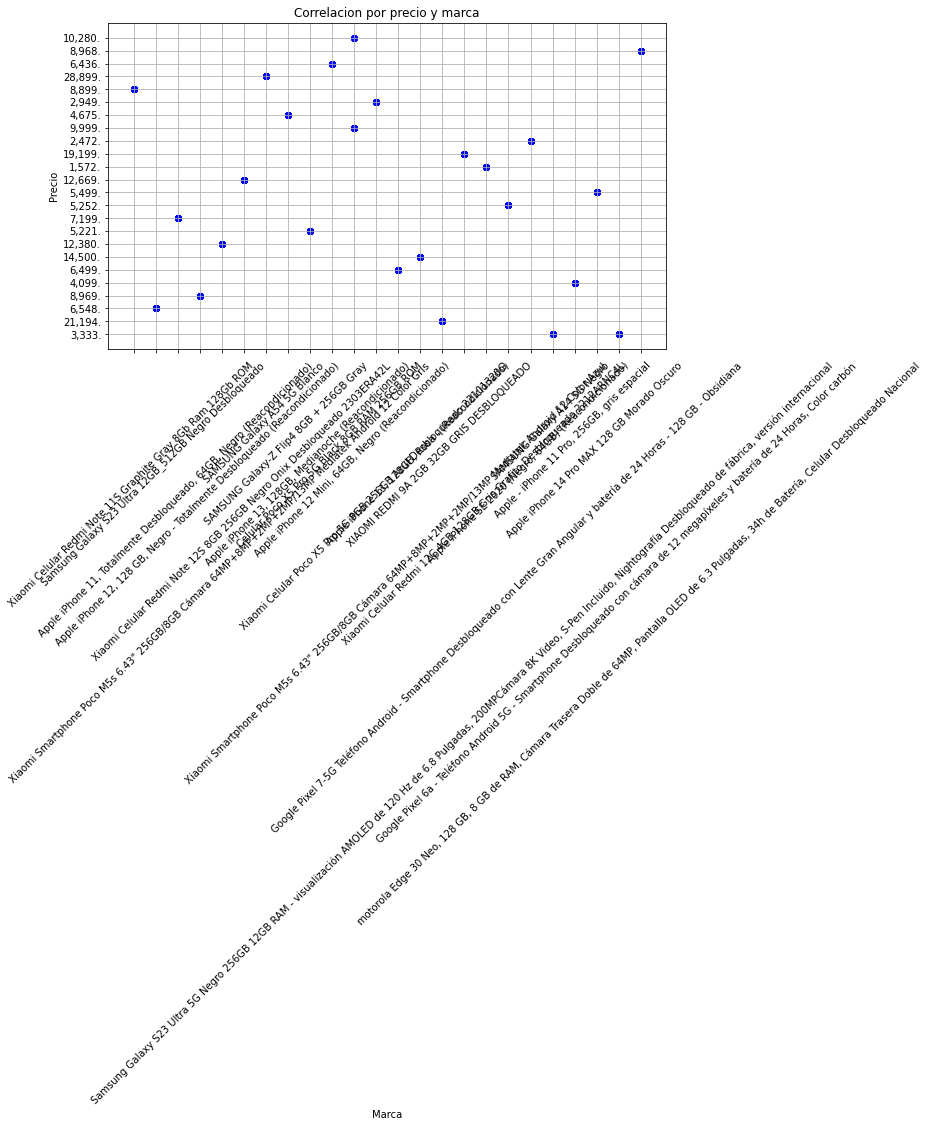

In [25]:
marcas_precio = df['Productos'].astype('category').cat.codes


plt.figure(figsize=(10, 6))
plt.scatter(marcas_precio, df['Precio'], c= 'b', marker= 'o', alpha= 0.7)
plt.title('Correlacion por precio y marca')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.xticks(range(len(df['Productos'].unique())),df['Productos'].unique(),rotation =45)
plt.grid()
plt.show()

A través de esta gráfica de puntos, se puede inferir que el celular más costoso es el iphone 12 reacondicionado de 128 gb debido a que es marca apple y es de mayor demanda el cual cuesta un poco más de 28 mil pesos, seguido de iphone 12 mini de 64 gb que cuesta un poco más de 21 mil pesos. Con esto podemos inferir que los productos Apple siguen siendo los más costosos del mercado.

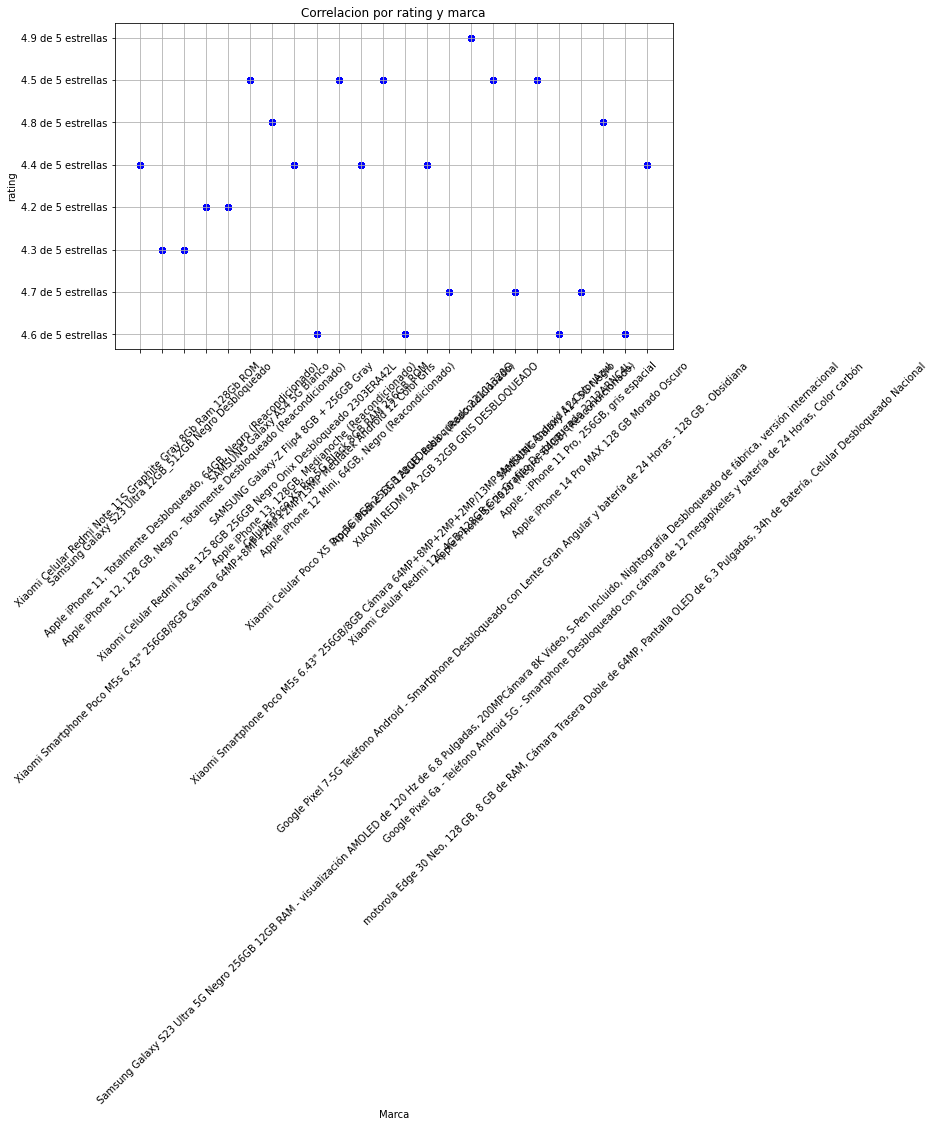

In [26]:
marcas_precio = df['Productos'].astype('category').cat.codes


plt.figure(figsize=(10, 6))
plt.scatter(marcas_precio, df['Rating'], c= 'b', marker= 'o', alpha= 0.7)
plt.title('Correlacion por rating y marca')
plt.xlabel('Marca')
plt.ylabel('rating')
plt.xticks(range(len(df['Productos'].unique())),df['Productos'].unique(),rotation =45)
plt.grid()
plt.show()

Con esta gráfica podemos percibir que el celular que tiene los 4.9 estrellas de 5 es el Xiaomi POCO x5 el cual es un modelo que posee un procesador Snapdragon y tiene 256 gb de almacenamiento a un costo accesible, mientras que el resto de los celulares Xiaomi se mantienen en las 4.7 estrellas. En este caso podemos ver que los productos Xiaomi tienen buenas referencias.

4. Conclusiones

En conclusión este análisis nos ayudo a demostrar que ante la gran variedad de telefonía celular los productos Apple se mantienen como los productos más caros del mercado y no precisamente como los mejores, por otra parte, los mejores del mercado son los Xiaomi con su modelo POCO el cual tiene buen rating de referencia y esta en un costo accesible comparado con marcas como Samsung y Apple. Este ejercicio ayudo a que se percibiera la gran variedad de precios, referencias entre otros elementos que ayudarán a un usuario a elegir bien su producto con una mejor percepción basada en datos.

A continuación empezaremos hacer la base de datos, primeramente con la conexión a la API la cual se continuara en un archivo py para que sea compatible con FastAPI

Referencias

Amazon (2023). Celulares y Accesorios. Amazon.com.mx. https://www.amazon.com.mx/gp/browse.html?node=9687422011&ref_=nav_em__mobile_0_2_10_4